# **Stroke Prediction**

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Reading Data

In [2]:
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Understanding the Data

In [3]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [4]:
df.shape

(5110, 12)

In [5]:
df.size

61320

In [6]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


In [10]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [11]:
df.isnull().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

# Visualizations

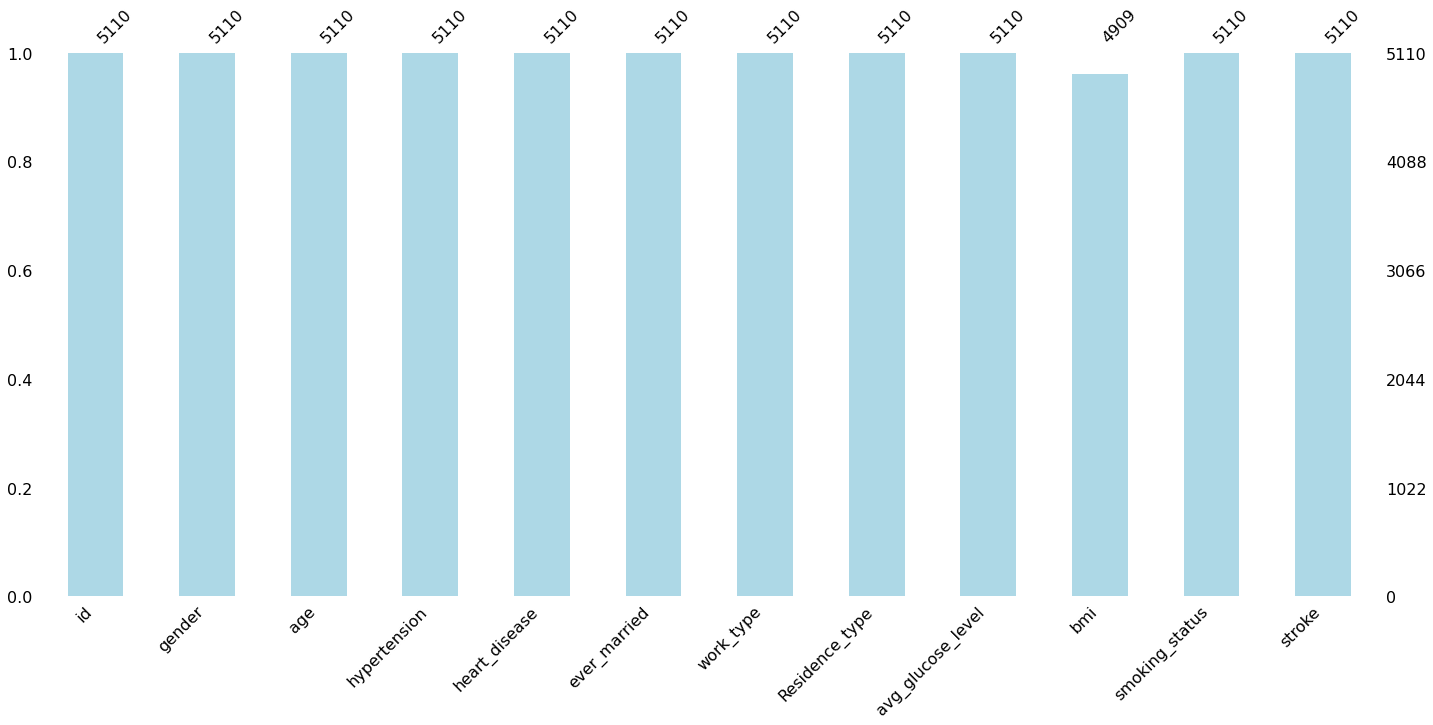

In [12]:
import missingno as no
no.bar(df, color='lightblue')

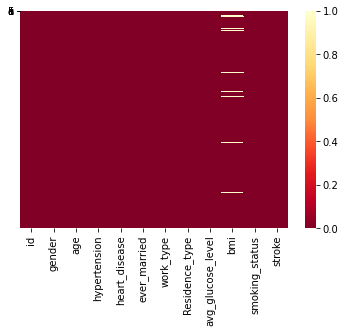

In [13]:
sns.heatmap(df.isnull(), yticklabels='False', cmap='YlOrRd_r')

# Handling Missing Values

In [14]:
df.dropna(inplace=True)

In [15]:
df.isnull().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

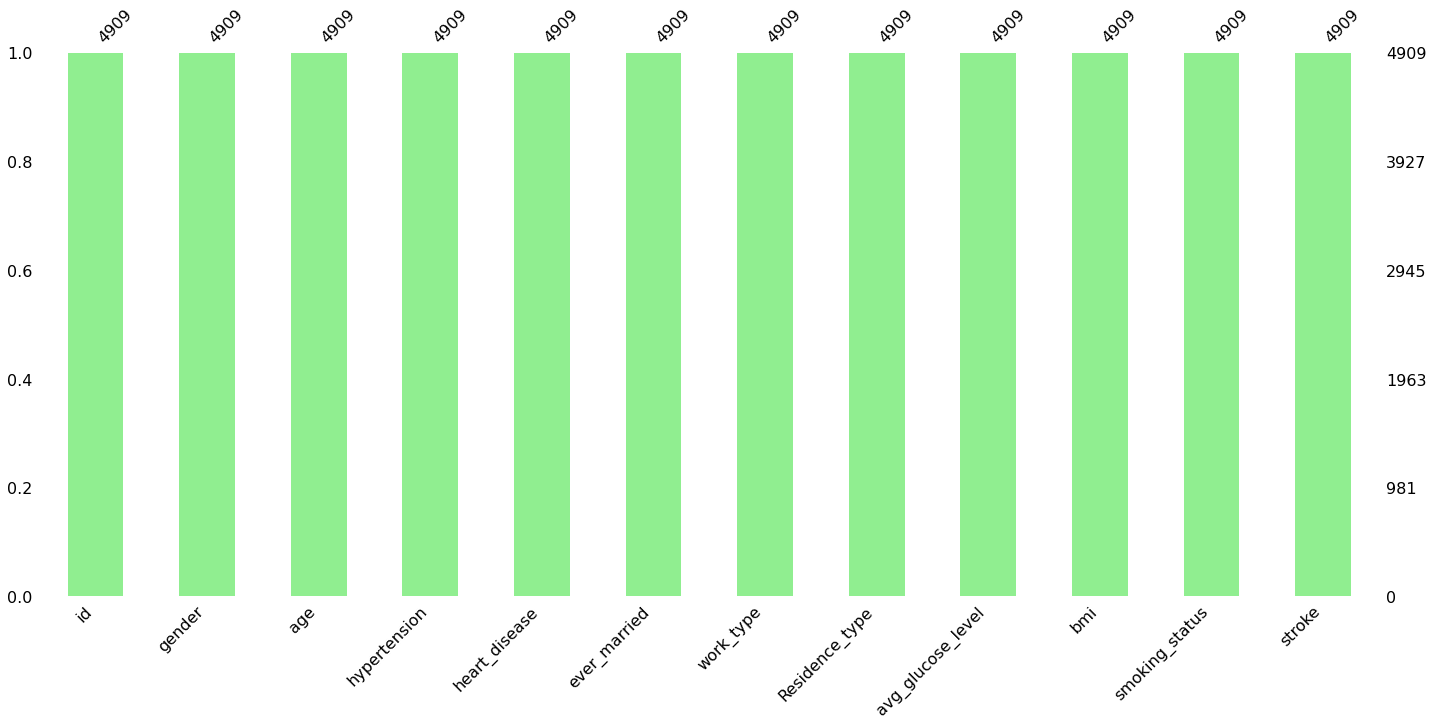

In [16]:
no.bar(df, color='lightgreen')

In [17]:
df.stroke.value_counts()

0    4700
1     209
Name: stroke, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


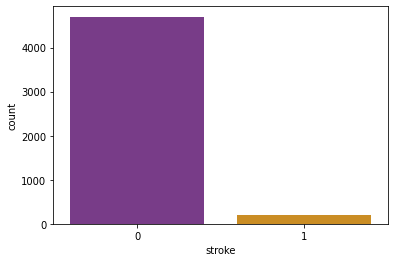

In [18]:
sns.countplot(df.stroke, palette='CMRmap')
plt.show()

In [19]:
df.gender.value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

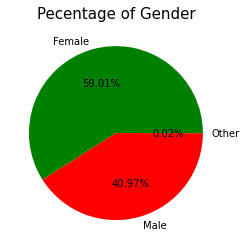

In [20]:
df1 = df['gender'].value_counts()
plt.pie(df1.values, labels=df1.index, autopct='%0.2f%%', colors='gr')
plt.title('Pecentage of Gender', fontsize=15)
plt.show()

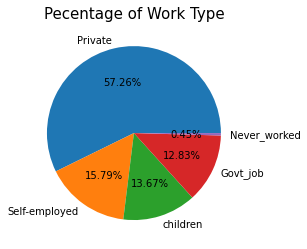

In [21]:
df1 = df['work_type'].value_counts()
plt.pie(df1.values, labels=df1.index, autopct='%0.2f%%')
plt.title('Pecentage of Work Type', fontsize=15)
plt.show()

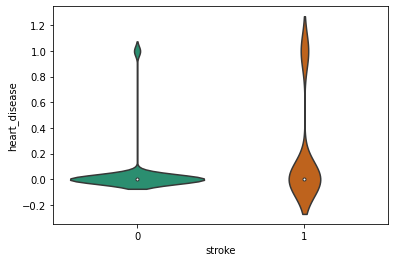

In [22]:
sns.violinplot(x=df.stroke, y=df.heart_disease, palette='Dark2')

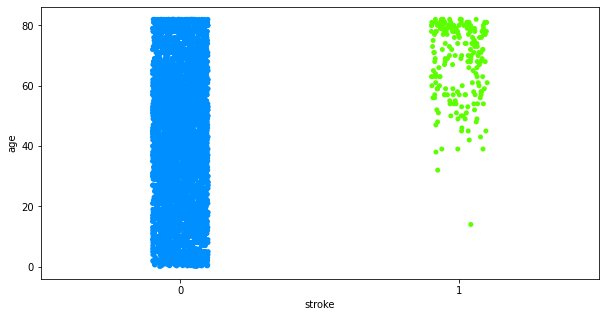

In [23]:
plt.figure(figsize=(10,5))
sns.stripplot(x=df['stroke'], y=df.age, palette='gist_rainbow_r')
plt.show()

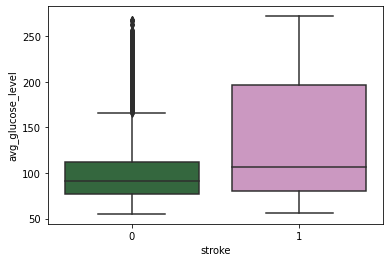

In [24]:
sns.boxplot(data=df, y='avg_glucose_level', x='stroke', palette='cubehelix')

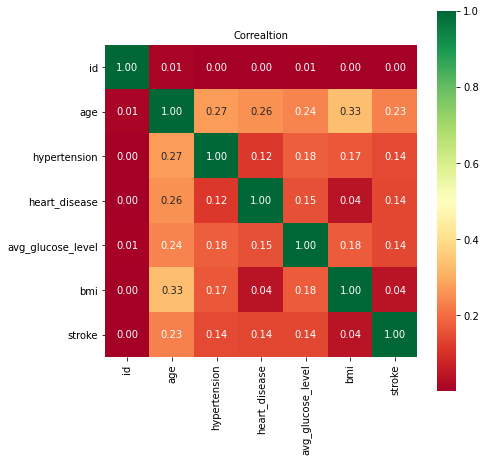

In [25]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), annot=True, fmt='.2f', square=True, cmap="RdYlGn")
plt.title("Correaltion", size=10)
plt.show()

<Figure size 1800x1080 with 0 Axes>

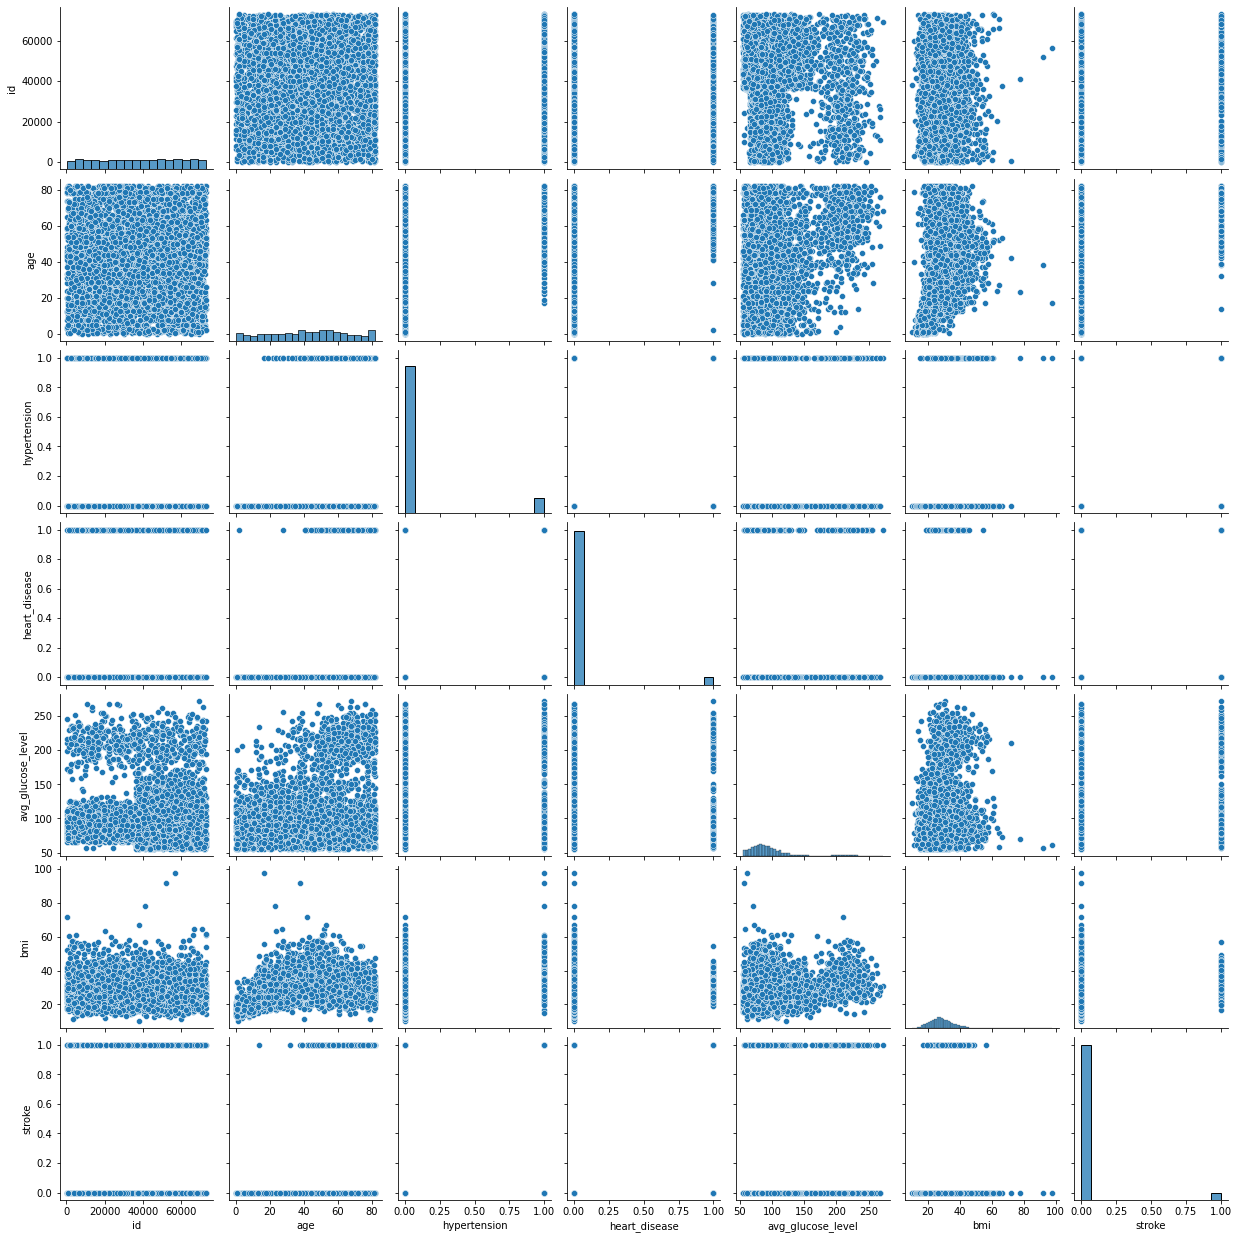

In [26]:
plt.figure(figsize=(25,15))
sns.pairplot(data=df, palette='gist_rainbow')
plt.show()

In [27]:
df['gender'] = df['gender'].map({'Male':0, 'Female':1})
df['Residence_type'] = df['Residence_type'].map({'Urban':0, 'Rural':1})
df['smoking_status'] = df['smoking_status'].map({'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3})
df['ever_married'] = df['ever_married'].map({'Yes':0, 'No':1})
df['work_type']= df['work_type'].map({'Private':0, 'Self-employed': 1, 'Govt_job':2, 'children':3, 'Never_worked':4})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


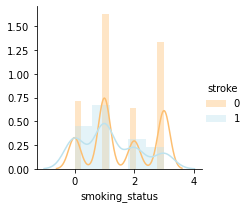

In [28]:
sns.FacetGrid(df, hue='stroke', palette='RdYlBu').map(sns.distplot, 'smoking_status').add_legend()

<Figure size 1440x1080 with 0 Axes>

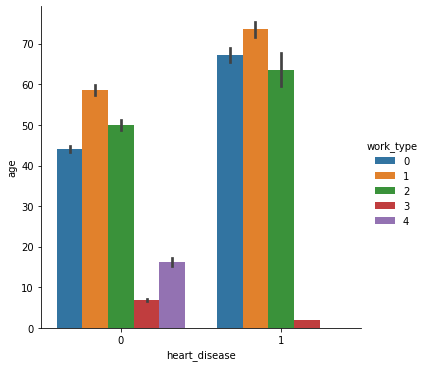

In [29]:
plt.figure(figsize=(20,15))
sns.catplot(x='heart_disease',y='age', hue="work_type", kind="bar", data=df)

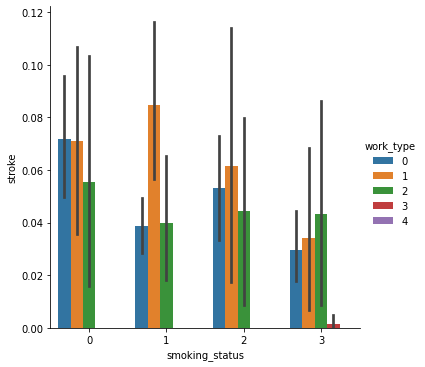

In [30]:
sns.catplot(x="smoking_status", y="stroke", hue="work_type", kind="bar", data=df)

# Splitting the Data into Dependent and Independent Variables

In [48]:
features = ['age', 'hypertension', 'heart_disease','ever_married','Residence_type','avg_glucose_level','bmi','gender','work_type','smoking_status']
label = ['stroke']
x = df[features]
y = df[label]

In [49]:
x.shape

(4908, 10)

In [50]:
x[:5]

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,gender,work_type,smoking_status
0,67.0,0,1,0,0,228.69,36.6,0.0,0,0
2,80.0,0,1,0,1,105.92,32.5,0.0,0,1
3,49.0,0,0,0,0,171.23,34.4,1.0,0,2
4,79.0,1,0,0,1,174.12,24.0,1.0,1,1
5,81.0,0,0,0,0,186.21,29.0,0.0,0,0


In [51]:
y.shape

(4908, 1)

In [52]:
y[:5]

,stroke
0,1
2,1
3,1
4,1
5,1


In [53]:
y.value_counts()

stroke
0         4699
1          209
dtype: int64

In [54]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X, y = smote.fit_resample(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


# Training and Testing the Data

In [172]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [173]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression

In [174]:
lm = LogisticRegression(random_state=5)
lm.fit(Xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Prediction

In [175]:
ypred_train = lm.predict(Xtrain)
ypred_test = lm.predict(Xtest)
print(ypred_test)

[0 0 0 ... 0 0 1]


In [176]:
df = pd.DataFrame(ypred_test, ytest)
df.head()

,0
0,0
0,0
0,0
1,1
0,0


## Confusion Matrix

In [177]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [178]:
cm = confusion_matrix(ytest, ypred_test)
cm

array([[712, 210],
       [193, 765]])

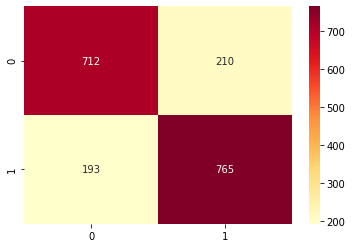

In [179]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlOrRd" ,fmt='g')

## Accuracy

In [180]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac1 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac1)

Accuracy of training data: 77.61372705506784
Accuracy of testing data: 78.56382978723404


# Support Vector Machine

In [181]:
svc = SVC(C=10)
svc.fit(Xtrain, ytrain)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Prediction

In [182]:
ypred_train = svc.predict(Xtrain)
ypred_test = svc.predict(Xtest)

## Confusion Matrix

In [183]:
cm = np.array(confusion_matrix(ypred_test, ytest))
cm

array([[629, 108],
       [293, 850]])

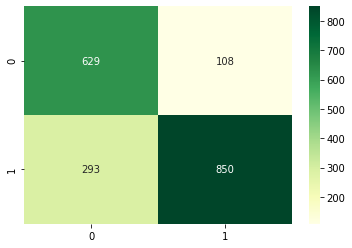

In [184]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGn" ,fmt='g')

## Accuracy

In [185]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac2 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac2)

Accuracy of training data: 77.6536312849162
Accuracy of testing data: 78.67021276595744


# Decission Tree

In [186]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(Xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

## Prediction

In [187]:
ypred_train = dt.predict(Xtrain)
ypred_test = dt.predict(Xtest)

## Confusion Matrix

In [188]:
cm = np.array(confusion_matrix(ypred_test, ytest))
cm

array([[867,  51],
       [ 55, 907]])

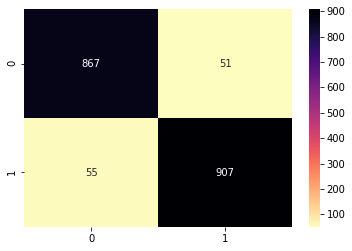

In [189]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="magma_r" ,fmt='g')

[Text(167.4, 190.26, 'X[0] <= 49.035\ngini = 0.5\nsamples = 7518\nvalue = [3777, 3741]'), Text(83.7, 135.9, 'X[0] <= 38.018\ngini = 0.152\nsamples = 2454\nvalue = [2250, 204]'), Text(41.85, 81.53999999999999, 'X[5] <= 59.734\ngini = 0.033\nsamples = 1685\nvalue = [1657, 28]'), Text(20.925, 27.180000000000007, 'gini = 0.226\nsamples = 77\nvalue = [67, 10]'), Text(62.775000000000006, 27.180000000000007, 'gini = 0.022\nsamples = 1608\nvalue = [1590, 18]'), Text(125.55000000000001, 81.53999999999999, 'X[4] <= 0.983\ngini = 0.353\nsamples = 769\nvalue = [593, 176]'), Text(104.625, 27.180000000000007, 'gini = 0.451\nsamples = 446\nvalue = [293, 153]'), Text(146.475, 27.180000000000007, 'gini = 0.132\nsamples = 323\nvalue = [300, 23]'), Text(251.10000000000002, 135.9, 'X[1] <= 0.0\ngini = 0.421\nsamples = 5064\nvalue = [1527, 3537]'), Text(209.25, 81.53999999999999, 'X[7] <= 0.999\ngini = 0.485\nsamples = 3080\nvalue = [1272, 1808]'), Text(188.32500000000002, 27.180000000000007, 'gini = 0.416

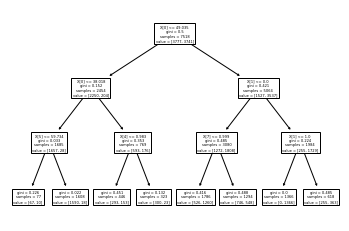

In [217]:
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier(max_depth=3)
clf_tree.fit(Xtrain, ytrain)
print(tree.plot_tree(clf_tree))

## Accuracy

In [190]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac3 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac3)

Accuracy of training data: 100.0
Accuracy of testing data: 94.36170212765957


# K Nearest Neighbour

In [191]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

## Prediction

In [192]:
ypred_train = knn.predict(Xtrain)
ypred_test = knn.predict(Xtest)

## Confusion Matrix

In [193]:
cm = np.array(confusion_matrix(ypred_test, ytest))
cm

array([[766,  17],
       [156, 941]])

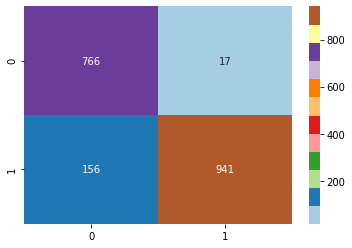

In [194]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="Paired" ,fmt='g')

## Accuracy

In [195]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac4 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac4)

Accuracy of training data: 93.82814578345304
Accuracy of testing data: 90.79787234042553


# Naive Bayes

In [196]:
gnb = GaussianNB()
gnb.fit(Xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

## Prediction

In [197]:
ypred_train = gnb.predict(Xtrain)
ypred_test = gnb.predict(Xtest)

## Confusion Matrix

In [198]:
cm = np.array(confusion_matrix(ypred_test, ytest))
cm

array([[677, 177],
       [245, 781]])

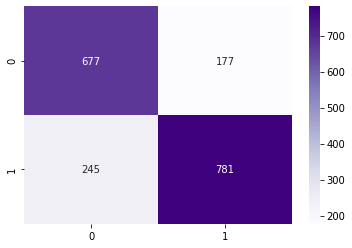

In [199]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="Purples" ,fmt='g')

## Accuracy

In [200]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac5 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac5)

Accuracy of training data: 77.64032987496675
Accuracy of testing data: 77.55319148936171


# Random Forest Classifier

In [201]:
rf = RandomForestClassifier(random_state=42)
rf.fit(Xtrain, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

## Prediction

In [202]:
ypred_train = rf.predict(Xtrain)
ypred_test = rf.predict(Xtest)

## Confusion Matrix

In [203]:
cm = np.array(confusion_matrix(ypred_test, ytest))
cm

array([[916,  44],
       [  6, 914]])

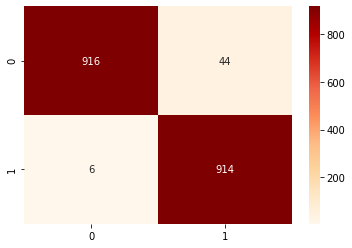

In [204]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="OrRd" ,fmt='g')

## Accuracy

In [205]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac6 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac6)

Accuracy of training data: 100.0
Accuracy of testing data: 97.3404255319149


# Comparing Accuracy of Different Models

In [206]:
accuracy =  {ac1: 'Logistic Regression', ac2: 'SVM', ac3:'Decission Tree', ac4:'KNN', ac5: 'Naive Bayes', ac6: 'Random Forest'}

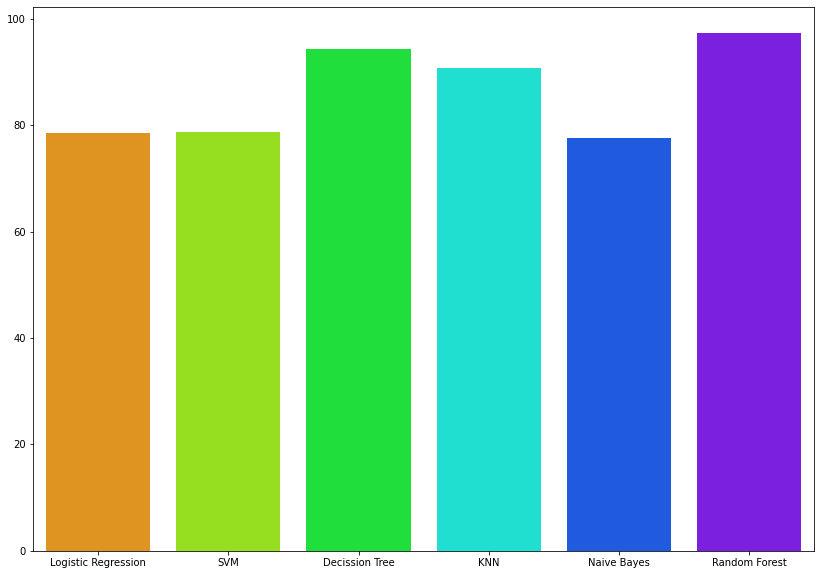

In [209]:
plt.figure(figsize=(14, 10))
model_accuracies = list(accuracy.values())
model_names = list(accuracy.keys())
sns.barplot(x=model_accuracies, y=model_names, palette='gist_rainbow');